## Clustering A549 cell-line feature data | Ascertaining Key Variables for the Hubs and Non-Hubs

#### Author: Shaurya Jauhari
#### Last Reviewed: December 28th, 2020

### Background

<p align = "justify"> This workflow is premised on the idea that with the clustering of the data on read-coverages (for the features), we'll be able to figure out the key variables that are truly representative of the Hubs or Non-Hubs, as defined by our previous analyses. </p>
<p align = "justify"> So, we began with a data matrix that held information about the reads associated with histone marks and protein-bindings, corresponding to our bin-intervals of 2Kb (genome-wide). From an initial analysis, we were able to classifiy such intervals as "Hubs" or "Non-Hubs". <i> Hubs </i> are those regions that interact at a distance of 1Mb or "Inf", as per the definitions in <a href= "https://doi.org/10.1093/database/baz162" >GREG</a>. </p> 

In [4]:
# --- Loading Data --- #
# --- From Logistic Regression --- #

classData <- read.table("../../transcriptionFactoriesGREG/MachineLearning/results/truePositives/a549LR.txt", header = T)
featureData <- read.table("../../transcriptionFactoriesGREG/MachineLearning//data/A549forML.txt", header = T)

# --- Removing Redundancy --- #

classDataUnique <- unique(classData)
featureDataUnique <- unique(featureData)

# --- Merging Data --- #

if(!require(dplyr)) install.packages(dplyr,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(dplyr))
one <- inner_join(classDataUnique, featureDataUnique, by = c("chr", "start", "end"))

# --- Applying Hierarchical Clustering --- #

distance <- dist(one[, - c(1:5, 18)], method = "euclidean")
cluster <- hclust(distance, method = "average")
plot(cluster, hang = -1, label = one$Prediction)

ERROR: Error: cannot allocate vector of size 4301.2 Gb


In [44]:
str(one)

'data.frame':	1074520 obs. of  18 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ YY1       : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


The hierarchical clustering is sensitive to the extent of data, and didn't execute successfully. Let us try a different flavor; k-means clustering. But before that, let's look at the distribution of variables which holds clue to nature of different classes.

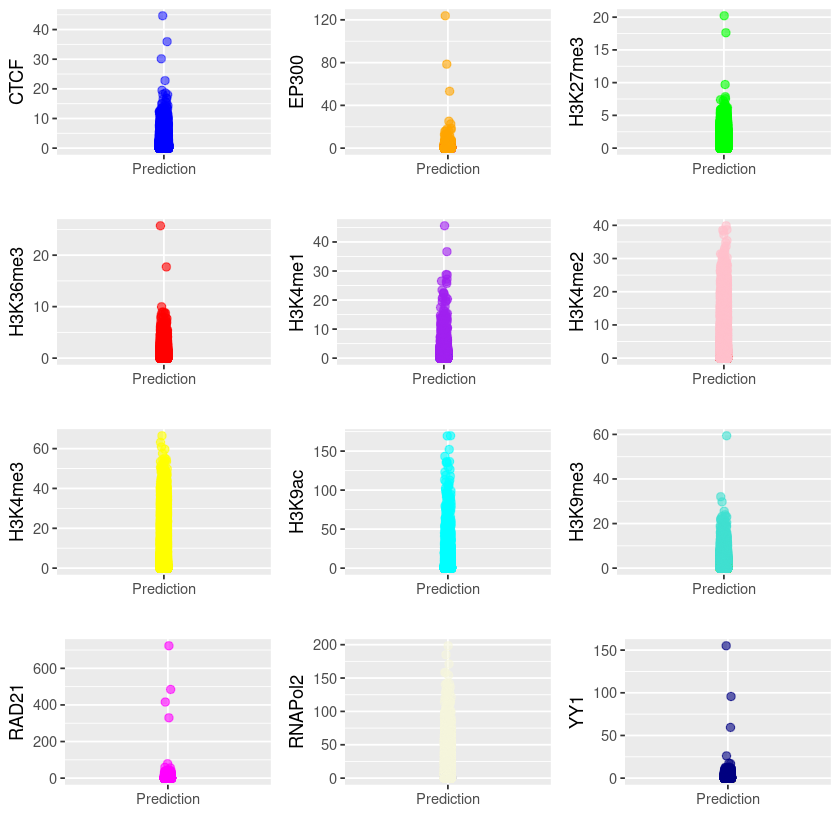

In [45]:
# --- K-Means Clustering --- #

requiredPackages <- c("tidyverse", "gridExtra")
newPackages <- requiredPackages[!(requiredPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gridExtra))

# --- Distribution of each variable --- #

plot1 <- one %>% 
  ggplot(aes(x = "Prediction", y = CTCF)) + 
  geom_jitter(width = .025, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="CTCF")

plot2 <-  one %>%
  ggplot(aes(x = "Prediction", y = EP300)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "orange") +
  labs(x = "", y="EP300")

plot3 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K27me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="H3K27me3")

plot4 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K36me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="H3K36me3")

plot5 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "purple") +
  labs(x = "", y="H3K4me1")

plot6 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "pink") +
  labs(x = "", y="H3K4me2")

plot7 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "yellow") +
  labs(x = "", y="H3K4me3")

plot8 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9ac)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "cyan") +
  labs(x = "", y="H3K9ac")

plot9 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "turquoise") +
  labs(x = "", y="H3K9me3")

plot10 <-  one %>%
  ggplot(aes(x = "Prediction", y = RAD21)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "magenta") +
  labs(x = "", y="RAD21")

plot11 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "beige") +
  labs(x = "", y="RNAPol2")

plot12 <-  one %>%
  ggplot(aes(x = "Prediction", y = YY1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "navy") +
  labs(x = "", y="YY1")


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12)

We can reflect that the variables are quite assymetrical to each others in terms of their values.  

In [6]:
summary(one)

      chr             start                end               Class.x       
 chr1   :105125   Min.   :        1   Min.   :     2000   Hub    :    750  
 chr2   : 85585   1st Qu.: 34740001   1st Qu.: 34742000   Non-Hub:1073770  
 chr4   : 84604   Median : 69328001   Median : 69330000                    
 chr3   : 72843   Mean   : 83699966   Mean   : 83701965                    
 chr6   : 71325   3rd Qu.:129870001   3rd Qu.:129872000                    
 chrX   : 68753   Max.   :249250561   Max.   :249250621                    
 (Other):586285                                                            
   Prediction           CTCF             EP300             H3K27me3      
 Hub    :    750   Min.   : 0.0000   Min.   :  0.0000   Min.   : 0.0000  
 Non-Hub:1073770   1st Qu.: 0.1753   1st Qu.:  0.0000   1st Qu.: 0.0000  
                   Median : 0.3945   Median :  0.3208   Median : 0.2182  
                   Mean   : 0.3943   Mean   :  0.3559   Mean   : 0.4328  
                   3rd

Now, let us execute the k-means clustering algorithm with an abitrary value of 3 for <i> k </i>. It is known to us that there are just two classes that exist.

In [46]:
kmeans3 <- kmeans(one[, - c(1:5, 18)], centers = 3, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans3$betweenss/kmeans3$totss)*100, "%")

The within cluster sum of squares for this clustering is 52.36211 %

The within cluster sum of squares is an important metric. It helps us determine how compact the clusters are, as in how similar are the elements of a cluster. The higher this percentage, the "cleaner" the clustering.

In [47]:
kmeans2 <- kmeans(one[, - c(1:5, 18)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2$betweenss/kmeans2$totss)*100, "%")

The within cluster sum of squares for this clustering is 44.41777 %

Now the percentage has gone down to 44.4 %. This run hasn't been any better.

<p align = "justify"> Understandably, it would be tedious to check for multiple values of <i> centers </i>, and we'll stick to the best estimate of 3 for now. Contrarily, we can explore another package, <a href = "https://github.com/o1iv3r/FeatureImpCluster" > FeatureImpCluster</a>, for eliciting the importance of variables. </p>

In [13]:
if(!require(devtools)) install.packages("devtools",
                                       dependencies = TRUE,
                                       repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
suppressPackageStartupMessages(library(devtools))

if(!require(FeatureImpCluster)) install_github("o1iv3r/FeatureImpCluster")
suppressPackageStartupMessages(library(FeatureImpCluster))

vctrs      (0.3.4  -> 0.3.5 ) [CRAN]
rlang      (0.4.8  -> 0.4.9 ) [CRAN]
pillar     (1.4.6  -> 1.4.7 ) [CRAN]
magrittr   (1.5    -> 2.0.1 ) [CRAN]
cli        (2.1.0  -> 2.2.0 ) [CRAN]
rstudioapi (0.12   -> 0.13  ) [CRAN]
pkgbuild   (1.1.0  -> 1.2.0 ) [CRAN]
rprojroot  (1.3-2  -> 2.0.2 ) [CRAN]
ps         (1.4.0  -> 1.5.0 ) [CRAN]
processx   (3.4.4  -> 3.4.5 ) [CRAN]
jsonlite   (1.7.1  -> 1.7.2 ) [CRAN]
isoband    (0.2.2  -> 0.2.3 ) [CRAN]
data.table (1.13.2 -> 1.13.4) [CRAN]


Installing 13 packages: vctrs, rlang, pillar, magrittr, cli, rstudioapi, pkgbuild, rprojroot, ps, processx, jsonlite, isoband, data.table

Installing packages into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmpd5JwvT/remotes3f5d402f5c36/o1iv3r-FeatureImpCluster-589c081/DESCRIPTION’ (712ms)
─  preparing ‘FeatureImpCluster’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘FeatureImpCluster_0.1.2.tar.gz’
   


Installing package into ‘/home/shaurya/R/x86_64-redhat-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



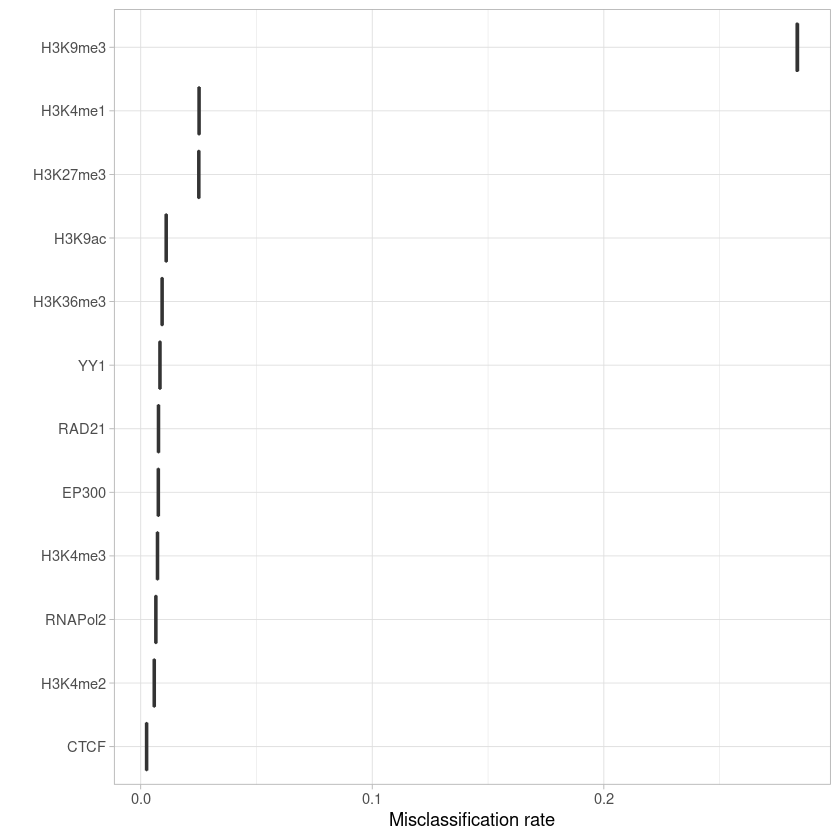

In [15]:
# --- Installing supporting package --- # 

if(!require(flexclust)) install.packages("flexclust",
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(flexclust))

# --- Running Algorithm --- #

set.seed(10)
res <- kcca(one[, -c(1:5, 18)], k = 3)
resultFeatureImp <- FeatureImpCluster(res, as.data.table(one[, -c(1:5, 18)]))
plot(resultFeatureImp, color= "none")

<p align = "justify"> What <i> FeatureImpCluster </i> helps us determine is the variable importance, via computation of the <i> permutation misclassification rate </i>. This metric for a variable is <b> the number of wrong cluster assignments divided by the number of observations (rows) given a permutation of the feature </b>. The mean misclassification rate over all iterations is interpreted as variable importance. </p>

In [17]:
PermMisClassRate(res, as.data.table(one[, - c(1:5, 18)]), varName = "H3K9me3")

[1] 0.2831488 0.2836066 0.2832055 0.2831246 0.2839761

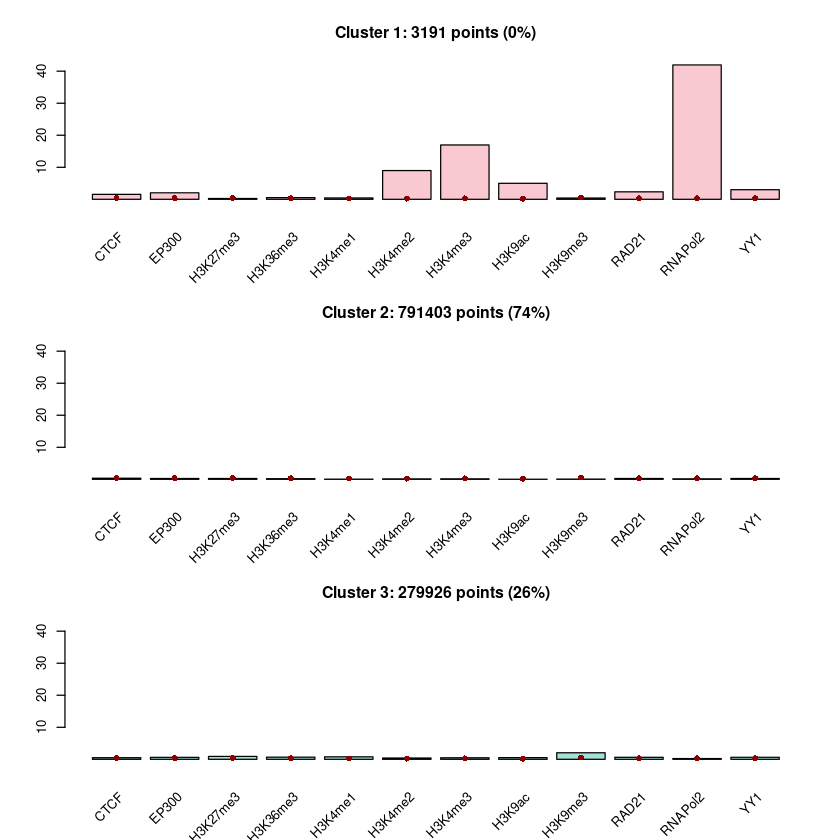

In [27]:
barplot(res)

<p align= "justify"> From the above plots, we can observe that <b>H3K9me3</b> is the most crucial variable in determining the cluster-partitions, and we find it enriched in <i>Cluster 3</i>. However, in <i>Cluster 1</i>, we find that <b>RNAPol2</b> is over-expressed. We would like to believe that the smallest cohort by cardinality, <i>Cluster1</i>, mostly consists of "Hubs" that manifests active transcription sites, while the other in mention is for "Non-Hubs" and is repressive of transcriptional activity. Another vindication for the clusters representing hubs and non-hubs is the <i>cardinality</i> of clusters; the instances of non-hubs outnumber those of the hubs by circa 1000 folds. Meanwhile, <i>Cluster2</i> could be contemplated as a <i>dummy</i> cluster.</p>

### Verifying with the true positives from Random Forests

In [18]:
classDataRF <- read.table("../../transcriptionFactoriesGREG/MachineLearning/results/truePositives/a549RF.txt", header = T)
classDataUniqueRF <- unique(classDataRF)

two <- inner_join(classDataUniqueRF, featureDataUnique, by = c("chr", "start", "end"))

In [19]:
str(two)

'data.frame':	1529002 obs. of  18 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ YY1       : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


As before, we'll consider some arbitrary number of cluster and check for the magnitude of within-cluster sum of squares. The one with the highest shall be chosen subsequently for further analysis. 

In [48]:
kmeans3_1 <- kmeans(two[, - c(1:5, 18)], centers = 3, nstart = 20, iter.max = 20) 
# increasing the value of iter.max from 10 (default) to 20, for dealing with convergence issues in the model.

cat("The within cluster sum of squares for this clustering is", (kmeans3_1$betweenss/kmeans3_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 53.26201 %

In [49]:
kmeans2_1 <- kmeans(two[, - c(1:5, 18)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2_1$betweenss/kmeans2_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 34.90802 %

In [50]:
kmeans4 <- kmeans(two[, - c(1:5, 18)], centers = 4, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans4$betweenss/kmeans4$totss)*100, "%")

The within cluster sum of squares for this clustering is 59.87033 %

In [53]:
kmeans5 <- kmeans(two[, - c(1:5, 18)], centers = 5, nstart = 20, iter.max = 40)
cat("The within cluster sum of squares for this clustering is", (kmeans5$betweenss/kmeans5$totss)*100, "%")

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 76450100)”


The within cluster sum of squares for this clustering is 65.3475 %

Out of these clustering runs, we find that the cleanest of groupings happen with 5 clusters. Despite, let's explore this further with 3 clusters.

In [35]:
# --- Running Algorithm --- #

set.seed(11)
res1 <- kcca(two[, -c(1:5, 18)], k = 3)
resultFeatureImp1 <- FeatureImpCluster(res1, as.data.table(two[, -c(1:5, 18)]))

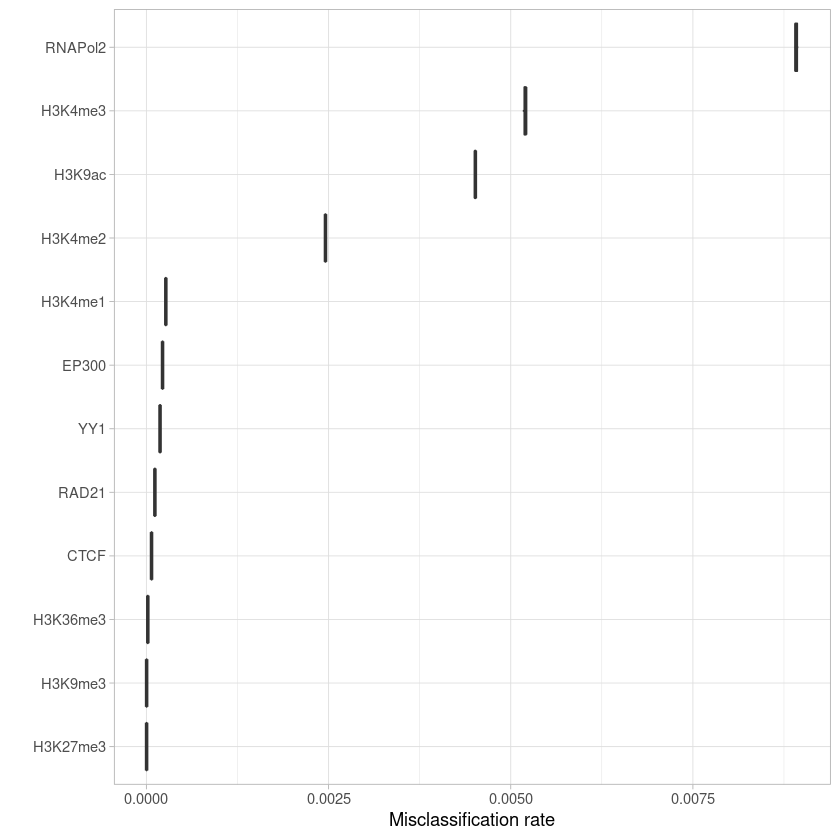

In [38]:
plot(resultFeatureImp1)

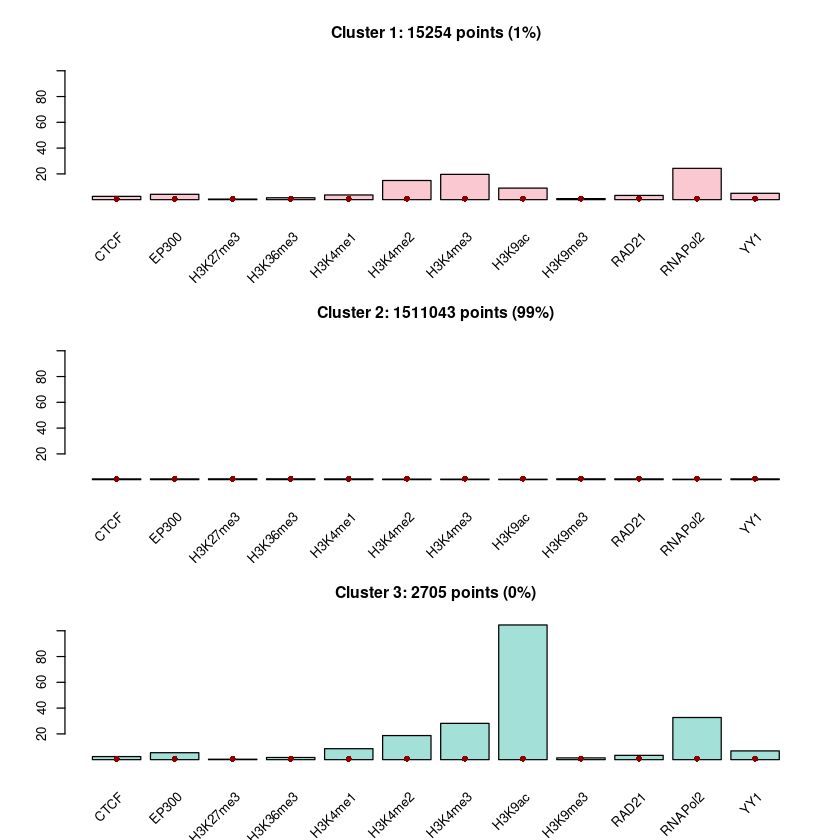

In [39]:
barplot(res1)

<p align = "justify"> Note that acetylation of the histone mark H3K9 is associated with active transcription, while it's methylation links to transcriptional repression. Additionally, we can also recall that methylation of H3K4 histone mark is tightly associated with the promoters of active genes. In clusters where transcription activators are expressed, we find that the repressors showcase almost no expression. This establishes that clusters have clear definitions for the elements of <i> Hubs </i> and <i> Non-Hubs</i>. </p>
Also, CTCF and YY1 proteins are known repressors of transcription, and can be viewed from the vantage point of the afore-mentioned objective.

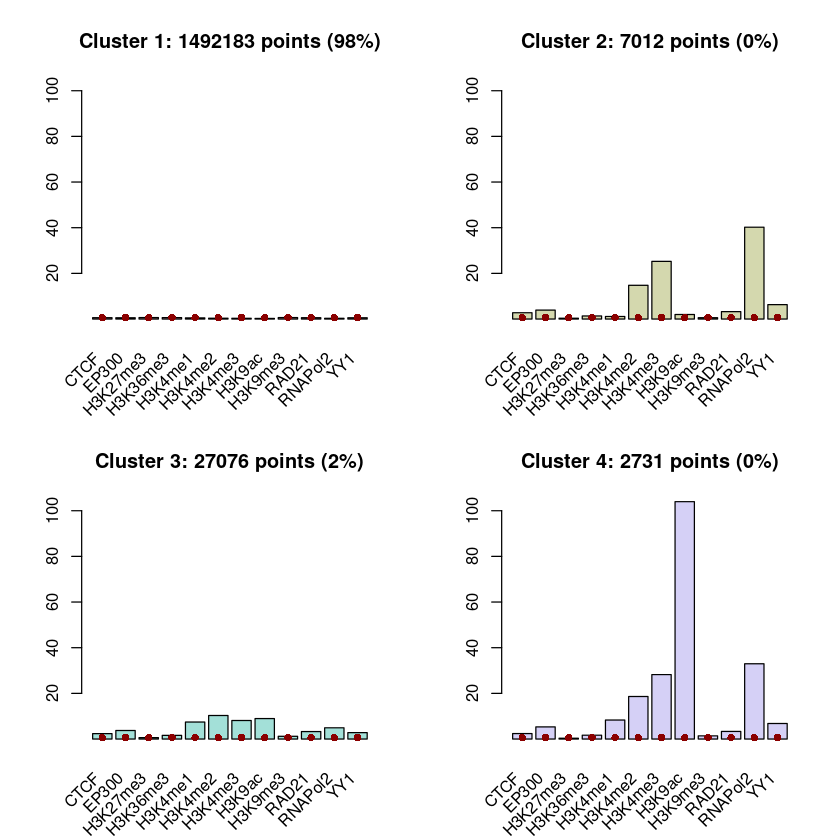

In [40]:
# --- Running Algorithm --- #
# --- 4 clusters --- #

set.seed(12)
res2 <- kcca(two[, -c(1:5, 18)], k = 4)
barplot(res2)

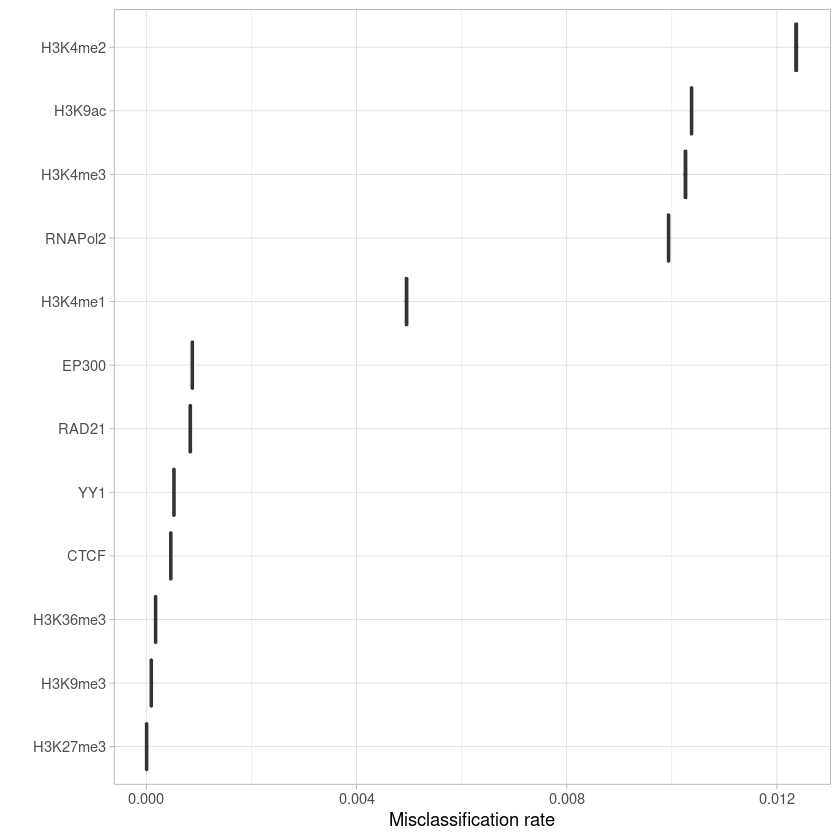

In [41]:
resultFeatureImp2 <- FeatureImpCluster(res2, as.data.table(two[, -c(1:5, 18)]))
plot(resultFeatureImp2)

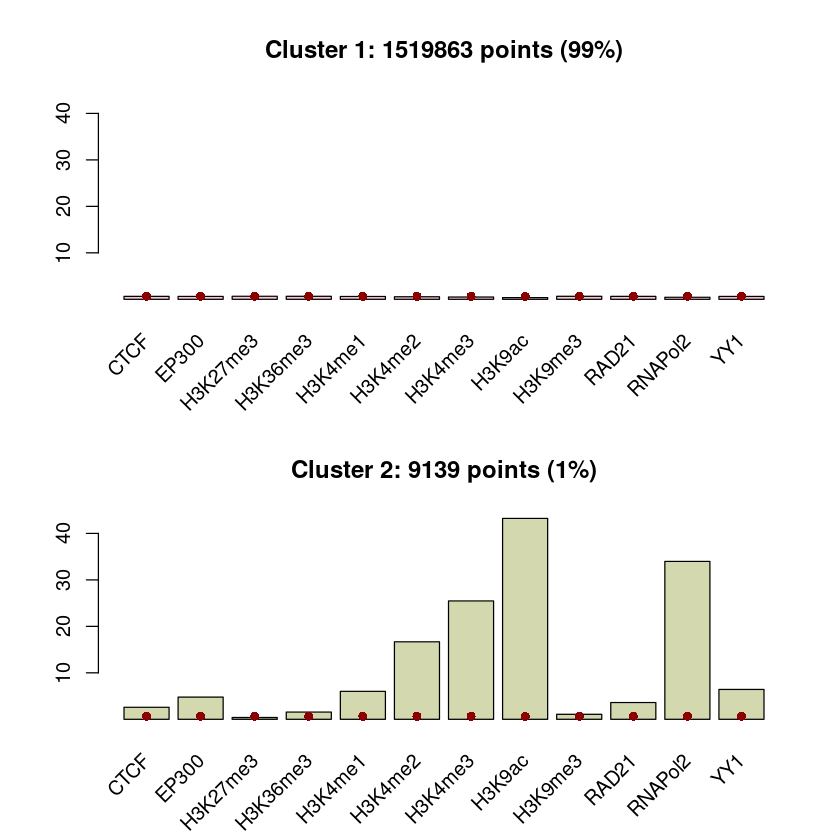

In [42]:
# --- Running Algorithm --- #
# --- 2 clusters --- #

set.seed(12)
res3 <- kcca(two[, -c(1:5, 18)], k = 2)
barplot(res3)

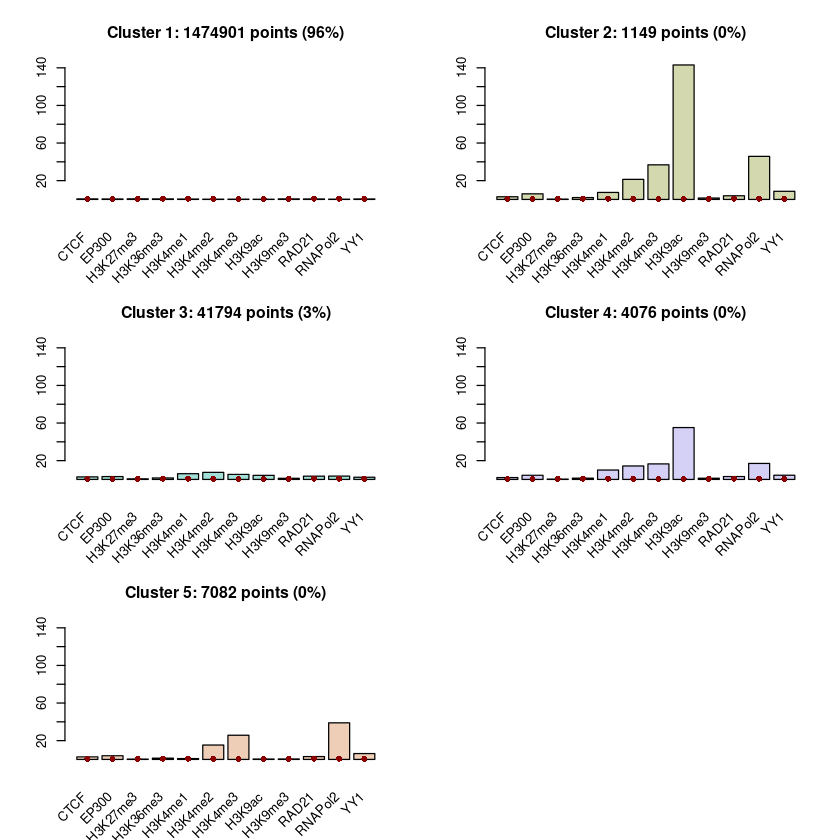

In [43]:
# --- Running Algorithm --- #
# --- 5 clusters --- #

set.seed(13)
res4 <- kcca(two[, -c(1:5, 18)], k = 5)
barplot(res4)

### Conclusion

<p align = "justify"> Feature variable <b> H3K9me3 </b> is shown to be the key entity underlining the <i> Non-Hubs</i>, while <b>RNAPol2 </b>, <b>H3K4me1 </b>, <b>H3K4me2 </b>, <b>H3K4me3</b>, and <b>H3K9ac </b> are pertinent in highlighting <i> Hubs</i>, in the A549 cell-line data. </p> 

In [16]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] FeatureImpCluster_0.1.2 data.table_1.13.4       flexclust_1.4-0        
 [4] modeltools_0.2-23       lattice_0.20-41         devtools_2.3.2         
 [7] usethis_1.6.3           gridExtra_2.3           forcats_0.5.0          
[10] stringr_1.4.0           purrr_0.3.4             readr_1.3.1            
[13